<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
# url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
dataset = pd.read_csv('world-happiness-report-2019.csv') # Скачал и загружаю данные с диска; сертификат ставить не готов

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
dataset.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

/Users/vladimirscherbakov/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vladimirscherbakov/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


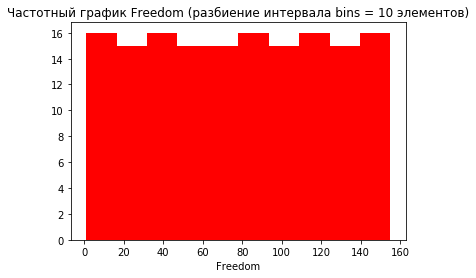

Ответ: распределение параметра Freedom при bins = 10 почти равномерное (вероятность случайных значений почти одинаковая)


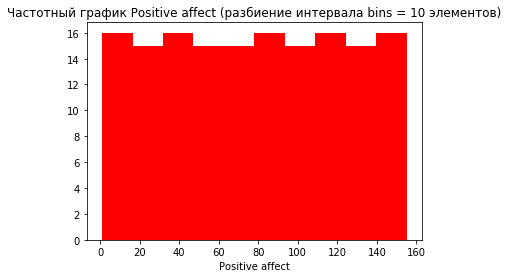

Ответ: распределение параметра Positive affect при bins = 10 почти равномерное (вероятность случайных значений одинаковая)


In [4]:
n, bins, patches = plt.hist(dataset['Freedom'], 10, facecolor='r')
plt.xlabel('Freedom')
plt.title('Частотный график Freedom (разбиение интервала bins = 10 элементов)')
plt.show()
print('Ответ: распределение параметра Freedom при bins = 10 почти равномерное (вероятность случайных значений почти одинаковая)')

n, bins, patches = plt.hist(dataset['Positive affect'], 10, facecolor='r')
plt.xlabel('Positive affect')
plt.title('Частотный график Positive affect (разбиение интервала bins = 10 элементов)')
plt.show()
print('Ответ: распределение параметра Positive affect при bins = 10 почти равномерное (вероятность случайных значений одинаковая)')

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [5]:
dt = dataset['Freedom']

dt_median = statistics.median(dt) # Медиана
try:
    dt_mode = statistics.mode(dt) # Мода (наиболее часто встречающиеся значение)
except:
    dt_mode = None

dt_mean_stat = statistics.mean(dt.values) # Математическое ожидание (среднее значение)
"""Альтернативная реализация"""
for s in dt.values:
    s += s
dt_mean = round(s / len(dt), 2)

dt_pstdev_stat = statistics.pstdev(dt) # Стандартное отклонение
"""Альтернативная реализация"""
def stdev(data):
    diffs = 0
    for n in data:
        diffs += (n - dt_mean)**(2)
    return (diffs/(len(data)-1))**(0.5)
dt_pstdev = stdev(dt.values)

dt_pvariance = statistics.pvariance(dt) # Дисперсия
dt_min = min(dt) # Минимальное значение
dt_max = max(dt) # Максимальное значение
dt_range = max(dt) - min(dt) # Размах
dt_isnull = dt.isnull().sum() # Количество пустых значений (выборосы)

print(f'Медиана = {dt_median}\nМода = {dt_mode}\nМатематическое ожидание (среднее значение) = {dt_mean} (через statistics.mean() = {dt_mean_stat})\nСтандартное отклонение = {dt_pstdev} (через statistics.pstdev() = {dt_pstdev_stat})\nДисперсия = {dt_pvariance}\nМинимальное значение выборки = {dt_min}\nМаксимальное значение выборки = {dt_max}\nРазмах = {dt_range}\nКоличество пустых значений (выбросы) = {dt_isnull}')

Медиана = 71.0
Мода = None
Математическое ожидание (среднее значение) = 1.97 (через statistics.mean() = nan)
Стандартное отклонение = nan (через statistics.pstdev() = nan)
Дисперсия = nan
Минимальное значение выборки = 1.0
Максимальное значение выборки = 155.0
Размах = 154.0
Количество пустых значений (выбросы) = 1


Почему нельзя найти моду?

Ответ: потому что распределение равномерное и множества значений встречаются одинаково часто

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

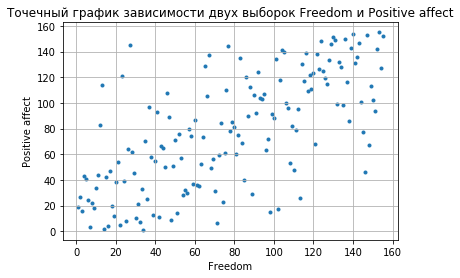

Коэффициент корреляции Пирсона: 0.68


In [7]:
plt.xlabel('Freedom')
plt.ylabel('Positive affect')
plt.title('Точечный график зависимости двух выборок Freedom и Positive affect')
plt.grid(True)
plt.scatter(dataset['Freedom'], dataset['Positive affect'], marker='.')
plt.show()

from scipy.stats import pearsonr
x = dataset['Freedom'].dropna()
y = dataset['Positive affect'].dropna()

corr, p_value = pearsonr(x, y)
print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}')

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [8]:
from sklearn import preprocessing

min_max_scaler_dt = preprocessing.MinMaxScaler(feature_range=(0, 1)) # Если надо централизовать относительно 0, то feature_range=(-1, 1) 
np_scaled = min_max_scaler_dt.fit_transform(dataset[['Freedom']])

freedom_norm = pd.DataFrame(np_scaled)
freedom_norm.head()

,0
0,0.025974
1,0.032468
2,0.012987
3,0.038961
4,0.116883


Построить матрицу корреляций для всех колонок таблицы

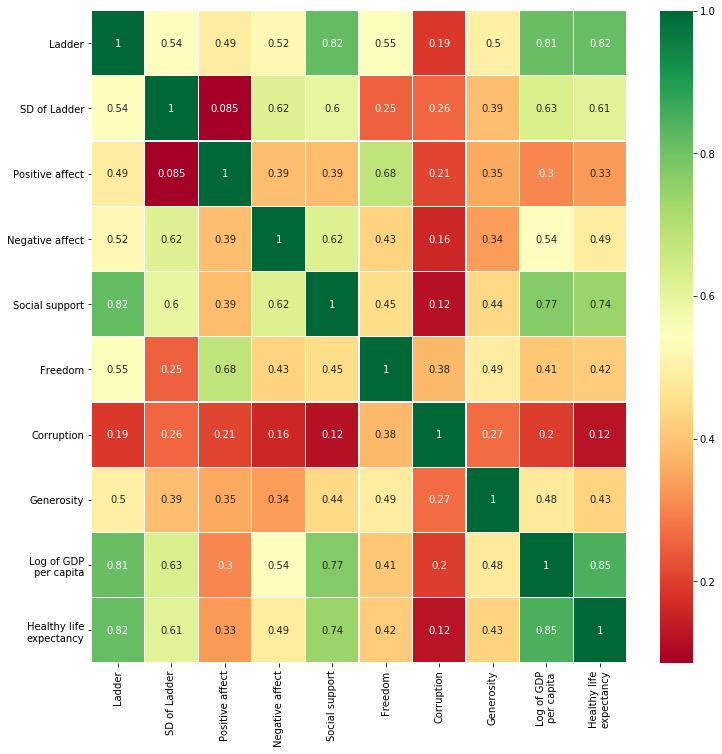

In [9]:
import seaborn as sns
sns.heatmap(dataset.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

Загрузить таблицу цен на авокадо: 

In [10]:
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

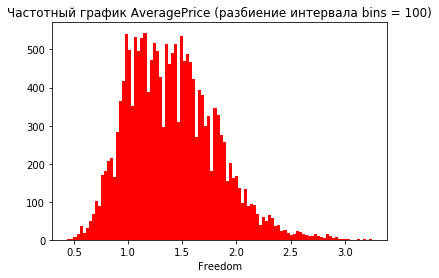

Ответ: распределение параметра AveragePrice при bins = 100 нормальное


In [11]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='r')
plt.xlabel('Freedom')
plt.title('Частотный график AveragePrice (разбиение интервала bins = 100)')
plt.show()
print('Ответ: распределение параметра AveragePrice при bins = 100 нормальное')

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

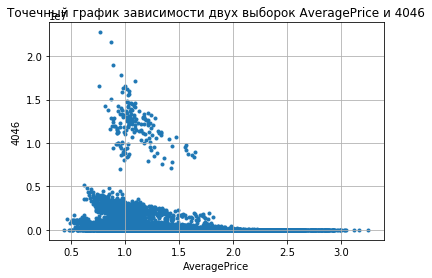

Коэффициент корреляции Пирсона: -0.21


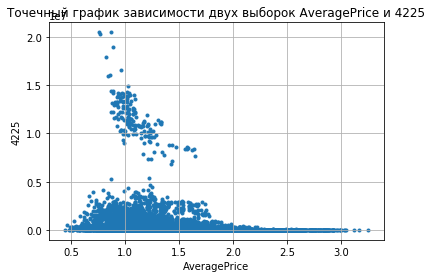

Коэффициент корреляции Пирсона: -0.17


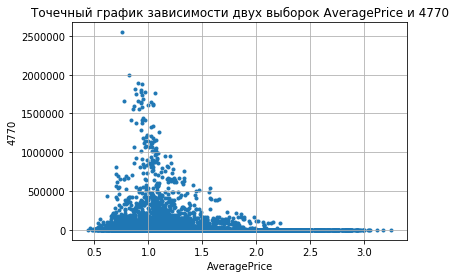

Коэффициент корреляции Пирсона: -0.18

Корелляция во всех трех случаях обратная (небольшая). Это значит, чем больше значение показателя 4046 / 4225 / 4770, тем вероятней меньше AveragePrice (но зависимость не сильная и не ярко выраженная).


In [12]:
from scipy.stats import pearsonr

plt.xlabel('AveragePrice')
plt.ylabel('4046')
plt.title('Точечный график зависимости двух выборок AveragePrice и 4046')
plt.grid(True)
plt.scatter(df['AveragePrice'], df['4046'], marker='.')
plt.show()

x = df['AveragePrice'].dropna()
y = df['4046'].dropna()

corr, p_value = pearsonr(x, y)
print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}')


plt.xlabel('AveragePrice')
plt.ylabel('4225')
plt.title('Точечный график зависимости двух выборок AveragePrice и 4225')
plt.grid(True)
plt.scatter(df['AveragePrice'], df['4225'], marker='.')
plt.show()

x = df['AveragePrice'].dropna()
y = df['4225'].dropna()

corr, p_value = pearsonr(x, y)
print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}')


plt.xlabel('AveragePrice')
plt.ylabel('4770')
plt.title('Точечный график зависимости двух выборок AveragePrice и 4770')
plt.grid(True)
plt.scatter(df['AveragePrice'], df['4770'], marker='.')
plt.show()

x = df['AveragePrice'].dropna()
y = df['4770'].dropna()

corr, p_value = pearsonr(x, y)
print(f'Коэффициент корреляции Пирсона: {round(corr, 2)}')


print('\nКорелляция во всех трех случаях обратная (небольшая). Это значит, чем больше значение показателя 4046 / 4225 / 4770, тем вероятней меньше AveragePrice (но зависимость не сильная и не ярко выраженная).')